<a href="https://colab.research.google.com/github/asdddddddddd/2025_AI_TI1B/blob/main/jobsheet_8/tugas_praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM 2

In [ ]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load dataset
dataset = pd.read_csv('Data_Gaji.csv', delimiter=';')
dataset.head()

,Tahun_Pengalaman,Gaji
0,1.1,590145000
1,1.3,693075000
2,1.5,565965000
3,2.0,652875000
4,2.2,598365000


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.dtypes

,0
Tahun_Pengalaman,float64
Gaji,int64


In [ ]:
dataset.isnull().sum()

,0
Tahun_Pengalaman,0
Gaji,0


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
# Normalisasi dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi Data Test
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([1.53964675e+09, 1.60898026e+09, 1.10977904e+09, 9.57245333e+08,
       1.38711305e+09, 1.73378056e+09])

In [ ]:
y_test

array([1707180000, 1641465000,  990435000,  854355000, 1474095000,
       1689525000])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung prediksi harga kamar berdasarkan data training
y_pred = regressor.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung Coefficient of Determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 1.0579413688280266e+16
Coefficient of Determination (R-squared): 0.9102354571044844


Text(0, 0.5, 'Gaji')

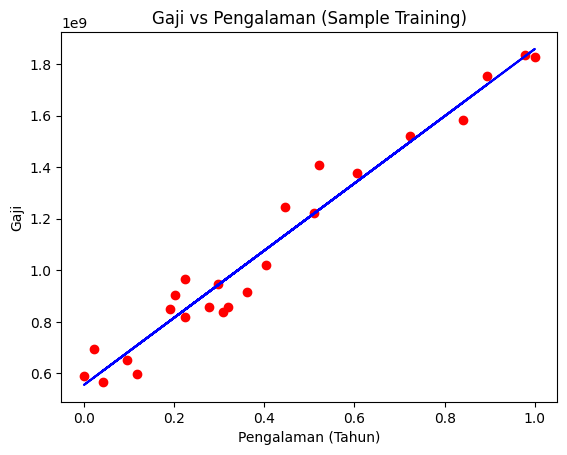

In [ ]:
# Visualisasikan sample training
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Training)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

Text(0, 0.5, 'Gaji')

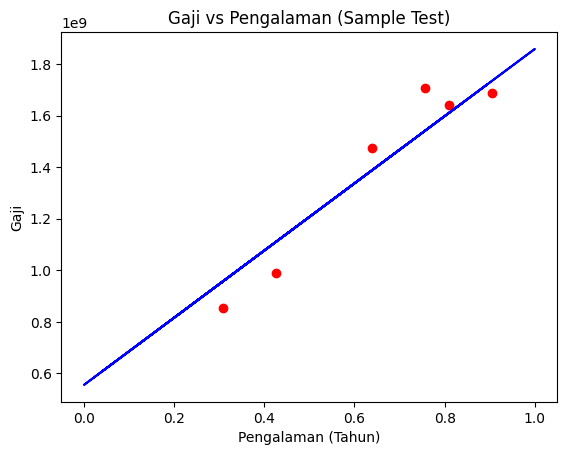

In [ ]:
# Visualisasikan sample test
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Test)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

## Linear Regression

Mean Squared Error: 1.0579413688280266e+16
R-squared: 0.9102354571044844


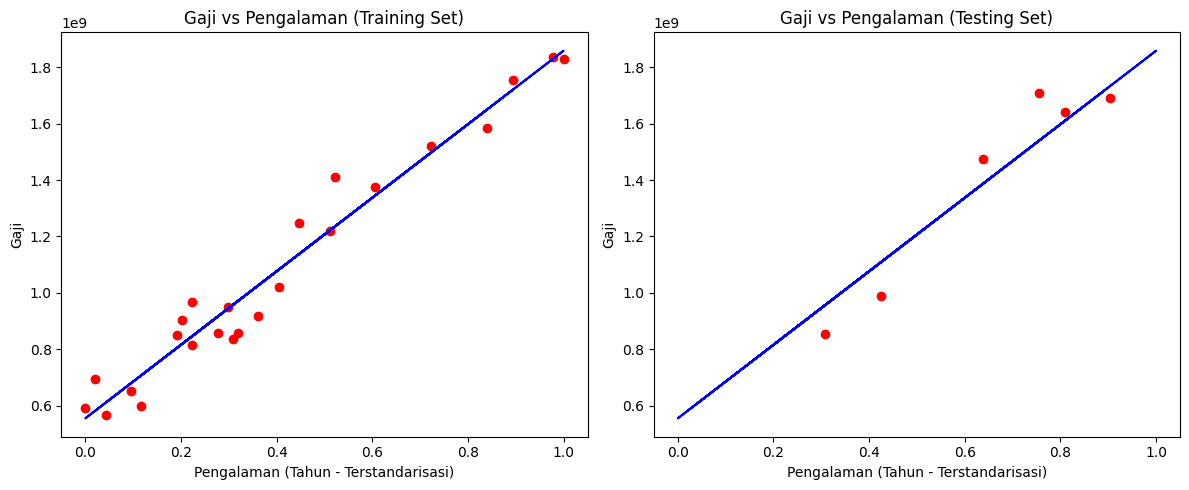

Prediksi Gaji untuk 3.5 tahun pengalaman: Rp887,911,831


In [ ]:
import joblib

# 1. Load Data
data = pd.read_csv('Data_Gaji.csv', delimiter=';')

# 2. Pisahkan fitur dan target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 3. Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# 4. Konversi ke numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# 5. Normalisasi data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Buat dan latih model Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 7. Simpan model dan scaler
joblib.dump(regressor, 'model_regresi_gaji.pkl')
joblib.dump(sc, 'scaler_pengalaman.pkl')

# 8. Evaluasi model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# 9. Visualisasi
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Training Set)')
plt.xlabel('Pengalaman (Tahun - Terstandarisasi)')
plt.ylabel('Gaji')

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Testing Set)')
plt.xlabel('Pengalaman (Tahun - Terstandarisasi)')
plt.ylabel('Gaji')

plt.tight_layout()
plt.show()

# 10. Fungsi Prediksi
def prediksi_gaji(tahun_pengalaman_baru):
    model = joblib.load('model_regresi_gaji.pkl')
    scaler = joblib.load('scaler_pengalaman.pkl')
    pengalaman_scaled = scaler.transform(np.array([[tahun_pengalaman_baru]]))
    gaji_prediksi = model.predict(pengalaman_scaled)
    return gaji_prediksi[0]

# Contoh penggunaan
tahun_input = 3.5
gaji_diprediksi = prediksi_gaji(tahun_input)
print(f"Prediksi Gaji untuk {tahun_input} tahun pengalaman: Rp{gaji_diprediksi:,.0f}")

## Melakukan Tunning

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Gunakan Ridge Regression untuk tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Evaluasi Ridge
y_pred_ridge = best_ridge.predict(X_test)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Best Alpha:", ridge_grid.best_params_)

# Gunakan Lasso Regression untuk tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Evaluasi Lasso
y_pred_lasso = best_lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Best Alpha:", lasso_grid.best_params_)

# Gunakan ElasticNet untuk tuning
elastic_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elastic = ElasticNet(max_iter=10000)
elastic_grid = GridSearchCV(elastic, elastic_params, scoring='r2', cv=5)
elastic_grid.fit(X_train, y_train)
best_elastic = elastic_grid.best_estimator_

# Evaluasi ElasticNet
y_pred_elastic = best_elastic.predict(X_test)
print("ElasticNet R2:", r2_score(y_test, y_pred_elastic))
print("ElasticNet Best Params:", elastic_grid.best_params_)

Ridge R2: 0.9088469496238744
Ridge Best Alpha: {'alpha': 0.01}
Lasso R2: 0.9102354570794086
Lasso Best Alpha: {'alpha': 0.01}
ElasticNet R2: 0.9031094493533327
ElasticNet Best Params: {'alpha': 0.01, 'l1_ratio': 0.8}
